In [ ]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Show the shape of the data
print("Training data shape", X_train.shape)
print("Test data shape", X_test.shape)



Training data shape (60000, 28, 28)
Test data shape (10000, 28, 28)


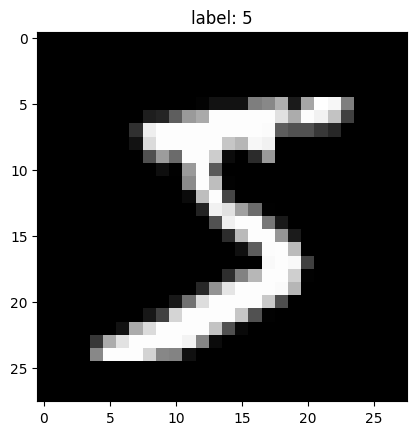

In [ ]:
#Displays the first handwritten digit in grayscale
plt.imshow(X_train[0], cmap='gray')

#Shows the correct label (digit) above the image
plt.title(f"label: {y_train[0]}")
plt.show()

**Preprocess the Data**

1 Normalize the Image Pixel Values

Current pixel range: 0 to 255
NNs learn better when pixel values are 0 to 1

In [ ]:
# Normalize pixel values (scale them to 0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#Convert Labels into One-Hot Encoding
#our network output layer will have 10 neurons (for digits 0–9)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (60000, 28, 28)
y_train shape: (60000, 10)


In [ ]:
model = Sequential()

# Step 1: Flatten the 28x28 images into a 1D vector (784 values)
# Think of it as unfolding a sheet of paper into a straight line.
model.add(Flatten(input_shape=(28, 28)))

# Step 2: Hidden layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))

#Step 3 : Output layer with 10 neurons (digits 0–9) and Softmax activation
model.add(Dense(10, activation='softmax' ))

#Step 4: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Steo 5 : Model Summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

🔹 Flatten Layer

Input: 28×28 image

Output: 784 values (1D vector)

Purpose: Convert image into a single list of numbers so it can be fed into a Dense layer

Parameters: 0 (this layer does not learn anything)

🔹 Dense Layer (Hidden Layer)

Neurons: 128

Activation: ReLU

Purpose: Learns patterns from the input image such as curves, edges, shapes

Parameters:

Formula: (784 × 128) + 128 = 100,480

These are the trainable weights + biases

🔹 Output Layer (Dense)

Neurons: 10

Activation: Softmax

Purpose: Predicts the digit (0–9)

Output: A probability for each digit

Parameters:

Formula: (128 × 10) + 10 = 1,290

🔹 Total Trainable Parameters

101,770 parameters (weights + biases)

These are the values the neural network will learn during training

🔹 Shape Explanation

(None, …) → None means the batch size can vary

After each layer, the shape becomes:

After Flatten → 784

After Hidden Layer → 128

After Output Layer → 10

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=5,         # Model will see all training images 5 times
    batch_size=32,    # Learns using 32 images at a time
    validation_split=0.1 # 10% of training data is used to check if the model is learning well
)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5580 - loss: 1.7179 - val_accuracy: 0.8750 - val_loss: 0.5739
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8580 - loss: 0.5671 - val_accuracy: 0.9080 - val_loss: 0.3671
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8912 - loss: 0.4086 - val_accuracy: 0.9177 - val_loss: 0.3079
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8984 - loss: 0.3634 - val_accuracy: 0.9225 - val_loss: 0.2789
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9041 - loss: 0.3404 - val_accuracy: 0.9262 - val_loss: 0.2628


In [ ]:
# Evaluation on test model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9003 - loss: 0.3479
Test Accuracy: 0.913100004196167


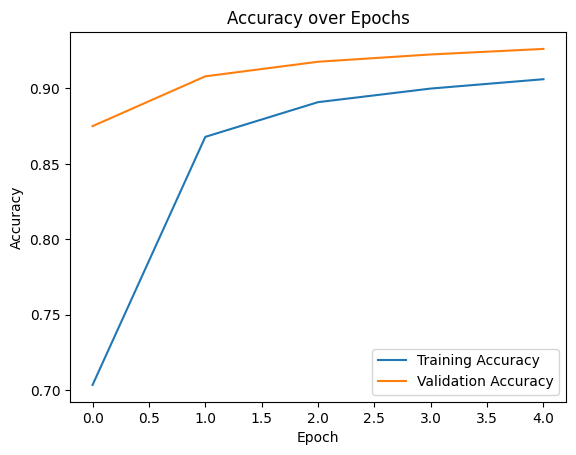

In [ ]:
# Plot Training vs Validation Accuracy

# Accuracy Chart

# This graph shows:

# Training Accuracy — how well the model predicts on the data it learned from

# Validation Accuracy — how well the model predicts on data it has NOT seen before

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


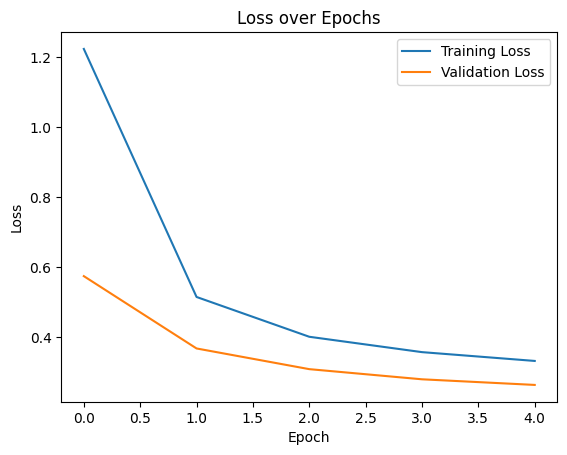

In [ ]:
# Plot Training vs Validation Loss

#Loss = how wrong the model is.

# This graph shows:

# Training Loss — how wrong the model is during training

# Validation Loss — how wrong it is on unseen data
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


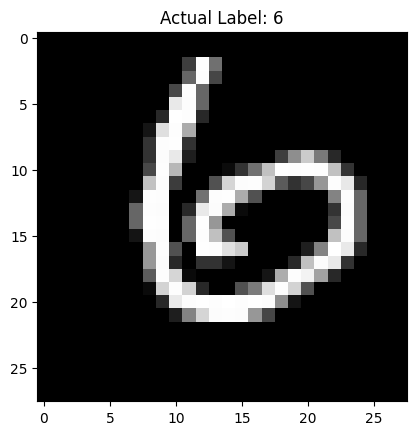

In [ ]:
# Choose a random image and test it

import random

# Pick a random index from the test set
index = random.randint(0, len(X_test) - 1)

# Show the image
plt.imshow(X_test[index], cmap='gray')
plt.title("Actual Label: " + str(np.argmax(y_test[index])))
plt.show()


In [ ]:
#Make Prediction

# Model expects a batch, so reshape the image
image = X_test[index].reshape(1, 28, 28)

# Predict probabilities
prediction = model.predict(image)

# Convert probabilities to a digit
predicted_digit = np.argmax(prediction)

print("Predicted Digit:", predicted_digit)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predicted Digit: 6


In [ ]:
model.save("mnist_digit_model.h5")
print("Model saved successfully!")


Model saved successfully!


In [ ]:
model.save("mnist_digit_model.keras")
print("Model saved in .keras format!")


Model saved in .keras format!
